<a href="https://colab.research.google.com/github/ankitaggarwal64/Agricultural-Equipment-Sales-Forecasting/blob/main/Data_Understanding(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Undestanding - Data Exploration and Visualisation :**
In this notebook, Following will be done:


*   Exporation of data and duplicates
*   Treatment of missing values
*   Exploration of Sales data and Indices







In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import sales and indices combined data
combined_sales_ind = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/combined_sales_ind.csv",parse_dates=['Time'], index_col='Time')

# displaying data
display(combined_sales_ind)

#Size of data - Sales and 25 Indices
print(combined_sales_ind.shape)

,Sales,livestock1,livestock2,livestock3,livestock4,livestock5,livestock6,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCSPOT.D7,STRTXOK.D7,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,0.80,116.55,116.91,151.20,48.12,47.38,323.04,307.93,3.21,3.82,398.89,407.10,414.74,3.67,4.06,131.0,138.0,0.28,0.86,15.21,16.30,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,0.78,106.08,106.22,138.38,43.36,42.83,328.90,320.25,3.22,3.78,375.02,390.98,424.61,3.49,4.10,129.0,137.0,0.30,0.88,14.66,16.39,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,0.71,100.37,101.76,121.82,37.07,30.84,349.49,326.23,3.29,3.88,381.28,408.77,440.15,3.68,4.14,131.0,135.0,0.33,0.92,14.09,14.82,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


(324, 36)


For understanding the indices provided, we will look at the description of the names of indices name provided in dictionary file

In [ ]:
# import dictionary file
Indices_description = pd.ExcelFile("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Raw Data/Dictionary.xlsx")

# Looking at the sheets avaialble in excel file
print(Indices_description.sheet_names) 

['Dictionary']


In [ ]:
# Creating a dictionary of sheets in workbook
Indices_dict = {sheet: Indices_description.parse(sheet) for sheet in Indices_description.sheet_names}

In [ ]:
# Extracting the Dictionary sheet from the workbook
Indices_desc = Indices_dict['Dictionary']
print(type(Indices_desc))
print(Indices_desc.shape)
display(Indices_desc)

<class 'pandas.core.frame.DataFrame'>
(35, 3)


,Indices_Name,Description,Indices_type
0,livestock1,"Broilers, Composite Average, Spot Price - Unit...",Commodity Prices
1,livestock2,"Live FOB Basis, Beef Breeds, Steers, 65% to 80...",Commodity Prices
2,livestock3,"Cattle Prices, Steers, Choice, 11-13 Centum We...",Commodity Prices
3,livestock4,"Feeder Cattle, Steers, Medium No. 1, 600-650 ...",Commodity Prices
4,livestock5,"Hog Prices, Barrows and Gilts, 6 Markets ($/CWT)",Commodity Prices
5,livestock6,"Hog Prices, Sows, No. 1-3 - Iowa/South Minneso...",Commodity Prices
6,corn1,"Corn Futures, 1st Expiration Nearby, Settlemen...",Commodity Prices
7,corn2,North Central and South Central Illinois Corn ...,Commodity Prices
8,corn3,"Producer Prices Received, Field Crops, Corn ($...",Commodity Prices
9,corn4,"Corn, No. 2 Yellow, Gulf Ports, US ($/bu)",Commodity Prices


**Observations from Indices description:**

1.   There are two types of indices - Commodity prices(25) and Economic Indices(10)
2.   Some of names of the commodity prices indices are too general or too specific, therefore those can be changed for out better analysis. 



In [ ]:
# Creating a dictionary for new column names
new_column_names = {"livestock1" : "livestock1_broilers","livestock2" : "livestock2_beef_steers",
                   "livestock3" : "livestock3_steers","livestock4" : "livestock4_steers","livestock5" : "livestock5_hog",
                   "livestock6" : "livestock6_hog","BRLCSPOT.D7" : "BRLCS_broilers","STRTXOK.D7" : "STRTXOK_beef_steers" }

# Rename Columns
clean_combined_sales_ind = combined_sales_ind.rename(columns = new_column_names)
display(clean_combined_sales_ind.head())

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3


In [ ]:
#Checking datatypes
clean_combined_sales_ind.dtypes

Sales                       int64
livestock1_broilers       float64
livestock2_beef_steers    float64
livestock3_steers         float64
livestock4_steers         float64
livestock5_hog            float64
livestock6_hog            float64
corn1                     float64
corn2                     float64
corn3                     float64
corn4                     float64
wheat1                    float64
wheat2                    float64
wheat3                    float64
wheat4                    float64
wheat5                    float64
hay1                      float64
hay2                      float64
dairy1                    float64
dairy2                    float64
dairy3                    float64
dairy4                    float64
dairy5                    float64
dairy6                    float64
BRLCS_broilers            float64
STRTXOK_beef_steers       float64
FarmIncome                float64
Non-ResidentialInvest     float64
HOUST                     float64
RealGDP       

In [ ]:
#Checking summary statistics
clean_combined_sales_ind.describe()

#Observation : based on count of values in each column, we can clealy see there are missing values in many columns

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
count,324.000000,310.000000,321.000000,224.000000,224.000000,224.000000,225.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,289.000000,324.000000,324.000000,220.000000,220.000000,258.000000,277.000000,264.000000,324.000000,310.000000,321.000000,324.000000,216.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,439.416667,0.700097,88.387321,96.881786,126.124330,49.478438,39.450267,333.574846,321.146605,3.154938,3.715309,422.529444,443.689877,509.611636,4.420432,5.367232,110.327469,118.854321,0.352045,1.136773,14.837558,14.336968,14.083485,15.342593,0.700097,88.387321,65.728519,1804.805556,1306.916667,12960.656481,6.049383,6.022191,1.872284,6.392346,6.133117,90.493395
std,221.052834,0.154801,25.070336,27.535873,43.602165,12.668950,15.210220,146.908376,149.931396,1.395110,1.594009,165.182594,172.665163,200.103259,1.729261,1.998499,34.938395,40.840729,0.170473,0.345275,3.449710,3.425877,3.448345,3.237528,0.154801,25.070336,21.973514,234.066304,423.626562,2415.163914,1.546703,2.313083,0.343634,1.785735,0.871779,26.365347
min,102.000000,0.450000,58.080000,58.280000,70.370000,16.620000,7.800000,178.290000,148.830000,1.520000,1.910000,194.360000,235.860000,267.670000,2.220000,2.770000,68.200000,71.000000,0.140000,0.730000,10.250000,8.570000,9.450000,11.000000,0.450000,58.080000,39.660000,1459.000000,478.000000,8865.600000,3.800000,3.250000,1.280000,3.350000,4.570000,25.300000
25%,263.000000,0.570000,69.330000,77.435000,95.867500,40.535000,28.320000,226.122500,215.297500,2.140000,2.557500,304.467500,315.277500,360.145000,3.207500,3.860000,83.975000,89.200000,0.220000,0.880000,12.250000,11.610000,11.607500,12.800000,0.570000,69.330000,47.720000,1609.825000,1004.000000,10711.025000,4.900000,3.250000,1.580000,4.887500,5.497500,68.272500
50%,397.000000,0.655000,80.460000,89.065000,114.275000,48.420000,38.440000,268.420000,262.095000,2.555000,2.965000,371.335000,384.370000,435.100000,3.750000,4.750000,96.550000,104.000000,0.290000,1.010000,14.085000,13.800000,13.235000,14.500000,0.655000,80.460000,58.950000,1740.850000,1340.000000,13262.250000,5.600000,6.000000,1.840000,6.390000,6.120000,93.080000
75%,571.000000,0.810000,98.110000,119.402500,145.387500,57.680000,47.380000,382.970000,365.237500,3.672500,4.310000,499.312500,527.990000,621.295000,5.425000,6.500000,129.000000,137.000000,0.480000,1.312500,16.597500,16.330000,15.765000,17.100000,0.810000,98.110000,79.260000,1989.350000,1604.250000,14903.325000,6.900000,8.250000,2.172500,7.680000,6.780000,106.550000
max,1498.000000,1.150000,167.500000,170.040000,262.340000,95.170000,93.440000,803.540000,815.900000,7.630000,8.460000,1039.530000,1096.330000,1229.330000,10.500000,11.990000,196.000000,227.000000,0.780000,2.090000,26.110000,24.600000,23.890000,25.700000,1.150000,167.500000,123.730000,2217.500000,2273.000000,16813.300000,10.000000,10.110000,2.430000,10.480000,7.730000,144.700000


**Exploration of Indices and Missing Values**

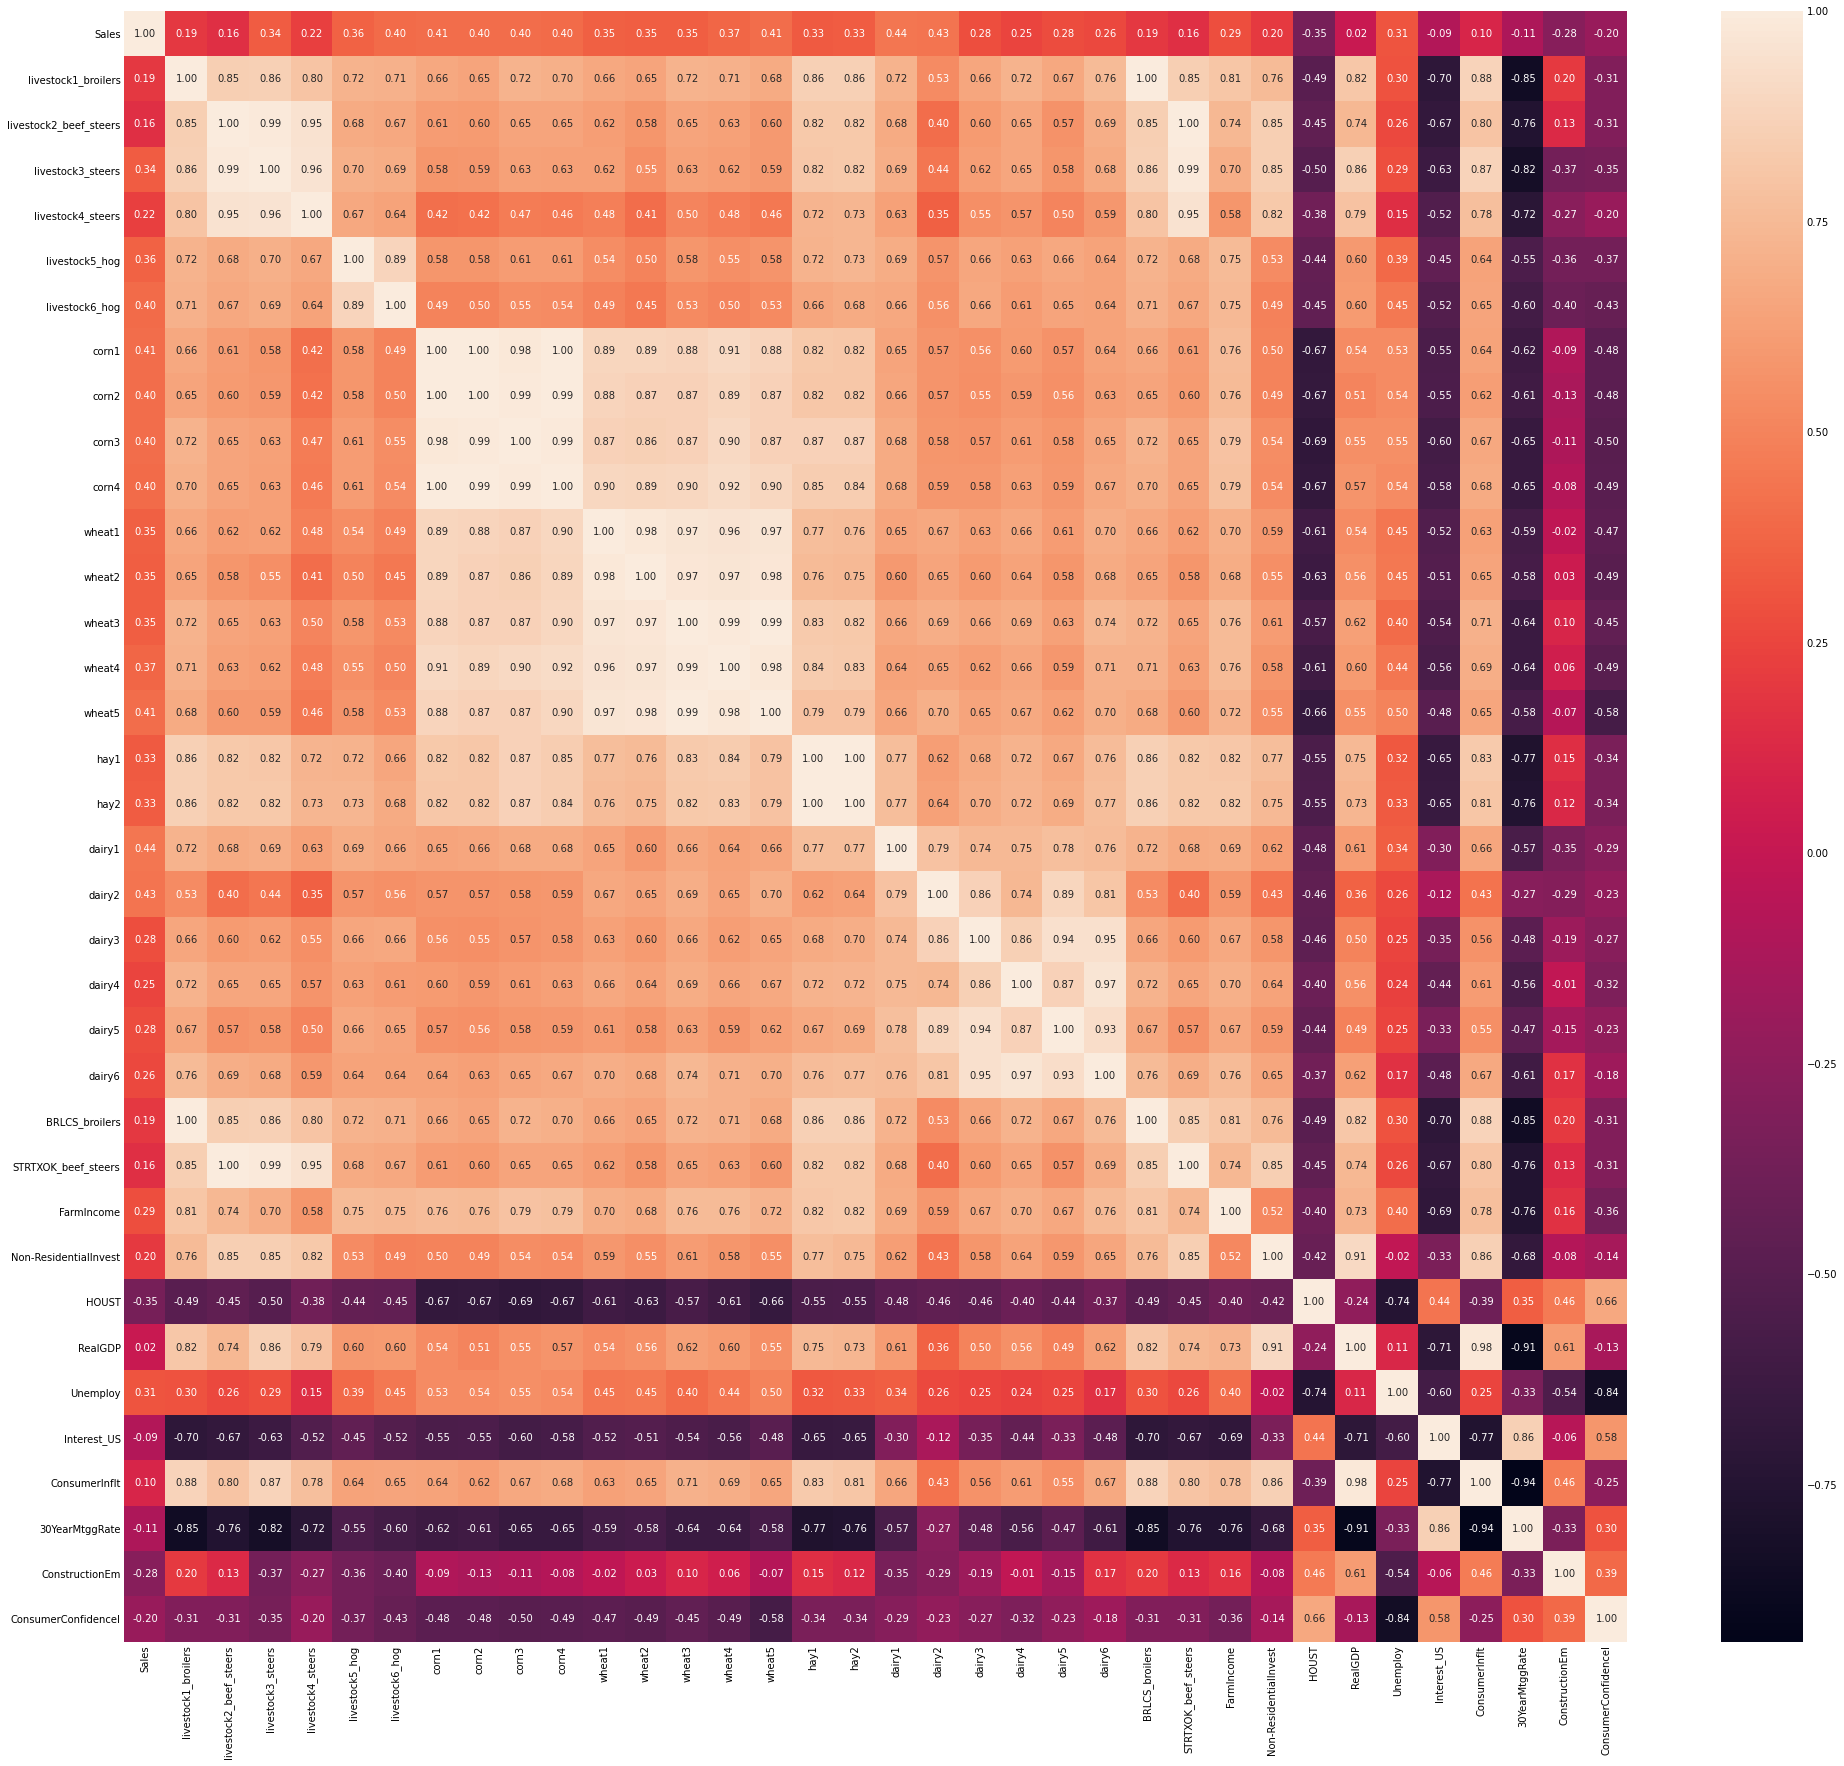

In [ ]:
# Plotting correlation heat map
fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(clean_combined_sales_ind.corr(),annot=True,fmt =".2f")

Observations from correlation map:
*   Some variables have perfect correlation between them. They might be duplicates or representing exaclty same information




In [ ]:
# Columns with perfect correlation 
clean_combined_sales_ind.columns[(clean_combined_sales_ind.corr()==1).sum()>1]

Index(['livestock1_broilers', 'livestock2_beef_steers', 'BRLCS_broilers',
       'STRTXOK_beef_steers'],
      dtype='object')

In [ ]:
# Importing data table
%load_ext google.colab.data_table
from google.colab import data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
#Creating a copy of clean_combined_sales_ind
clean_combined_sales_ind_copy = clean_combined_sales_ind.copy()

# Checking rows with missing values
clean_combined_sales_ind_copy["sum"] = clean_combined_sales_ind_copy.isnull().sum(axis=1)

# Columns with atleast one missing value
miss_val_columns = clean_combined_sales_ind_copy.loc[:,clean_combined_sales_ind_copy.isnull().any()].columns
print(miss_val_columns)
type(miss_val_columns)

Index(['livestock1_broilers', 'livestock2_beef_steers', 'livestock3_steers',
       'livestock4_steers', 'livestock5_hog', 'livestock6_hog', 'wheat5',
       'dairy1', 'dairy2', 'dairy3', 'dairy4', 'dairy5', 'BRLCS_broilers',
       'STRTXOK_beef_steers', 'Non-ResidentialInvest'],
      dtype='object')


pandas.core.indexes.base.Index

In [ ]:
# Looking at table with columns having missing values
miss_val_col_data = clean_combined_sales_ind_copy[list(miss_val_columns)][clean_combined_sales_ind_copy["sum"]>0]

# Looking at data table
data_table.DataTable(miss_val_col_data , include_index= True, num_rows_per_page=10)

,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,wheat5,dairy1,dairy2,dairy3,dairy4,dairy5,BRLCS_broilers,STRTXOK_beef_steers,Non-ResidentialInvest
Time,,,,,,,,,,,,,,,
1990-01-31,NaN,79.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.06,NaN
1990-02-28,NaN,79.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.04,NaN
1990-03-31,NaN,79.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.16,NaN
1990-04-30,NaN,79.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.89,NaN
1990-05-31,NaN,78.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-11-30,0.64,61.88,61.81,71.99,17.66,11.13,3.54,0.24,1.07,15.40,16.84,14.87,0.64,61.88,NaN
1998-12-31,0.60,59.44,59.36,73.33,19.95,7.80,3.44,0.24,1.09,16.34,17.34,13.44,0.60,59.44,NaN
2013-10-31,0.92,NaN,130.09,169.87,64.95,65.09,8.85,0.57,1.84,20.56,18.22,20.17,0.92,NaN,2076.3


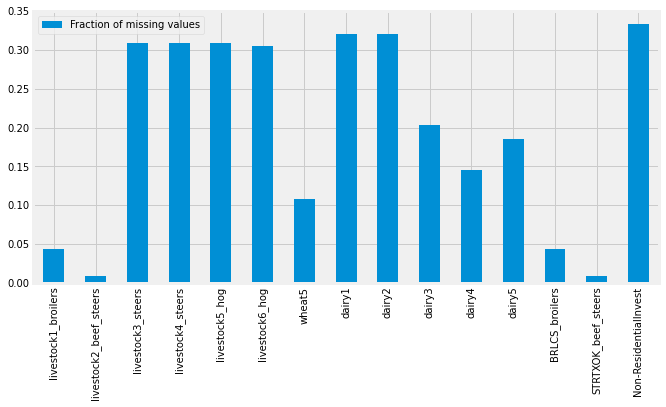

In [ ]:
#Fraction of missing values in columns with missing values
fract_miss_col = pd.DataFrame(clean_combined_sales_ind_copy[list(miss_val_columns)].isnull().mean())
fract_miss_col.columns = ["Fraction of missing values"]

#Ploting fraction of missing values
fract_miss_col.plot.bar(figsize= (10,5))

**Observation from Fraction of missing values:**
Imputation in variables with >20% missing values might not be a good approach. We might have to consider dropping variables or dropping certain portion of time series. 

In [ ]:
# Marking Rows with Missing values with _isNA column labels
IsNA_col_labels= []
for column in list(miss_val_columns):
  clean_combined_sales_ind[[column+"_isNA"]]= clean_combined_sales_ind[[column]].isnull()*1
  x=column+"_isNA"
  IsNA_col_labels.append(x)

display(clean_combined_sales_ind)
print(IsNA_col_labels)

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI,livestock1_broilers_isNA,livestock2_beef_steers_isNA,livestock3_steers_isNA,livestock4_steers_isNA,livestock5_hog_isNA,livestock6_hog_isNA,wheat5_isNA,dairy1_isNA,dairy2_isNA,dairy3_isNA,dairy4_isNA,dairy5_isNA,BRLCS_broilers_isNA,STRTXOK_beef_steers_isNA,Non-ResidentialInvest_isNA
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,0.80,116.55,116.91,151.20,48.12,47.38,323.04,307.93,3.21,3.82,398.89,407.10,414.74,3.67,4.06,131.0,138.0,0.28,0.86,15.21,16.30,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-30,200,0.78,106.08,106.22,138.38,43.36,42.83,328.90,320.25,3.22,3.78,375.02,390.98,424.61,3.49,4.10,129.0,137.0,0.30,0.88,14.66,16.39,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-31,611,0.71,100.37,101.76,121.82,37.07,30.84,349.49,326.23,3.29,3.88,381.28,408.77,440.15,3.68,4.14,131.0,135.0,0.33,0.92,14.09,14.82,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['livestock1_broilers_isNA', 'livestock2_beef_steers_isNA', 'livestock3_steers_isNA', 'livestock4_steers_isNA', 'livestock5_hog_isNA', 'livestock6_hog_isNA', 'wheat5_isNA', 'dairy1_isNA', 'dairy2_isNA', 'dairy3_isNA', 'dairy4_isNA', 'dairy5_isNA', 'BRLCS_broilers_isNA', 'STRTXOK_beef_steers_isNA', 'Non-ResidentialInvest_isNA']


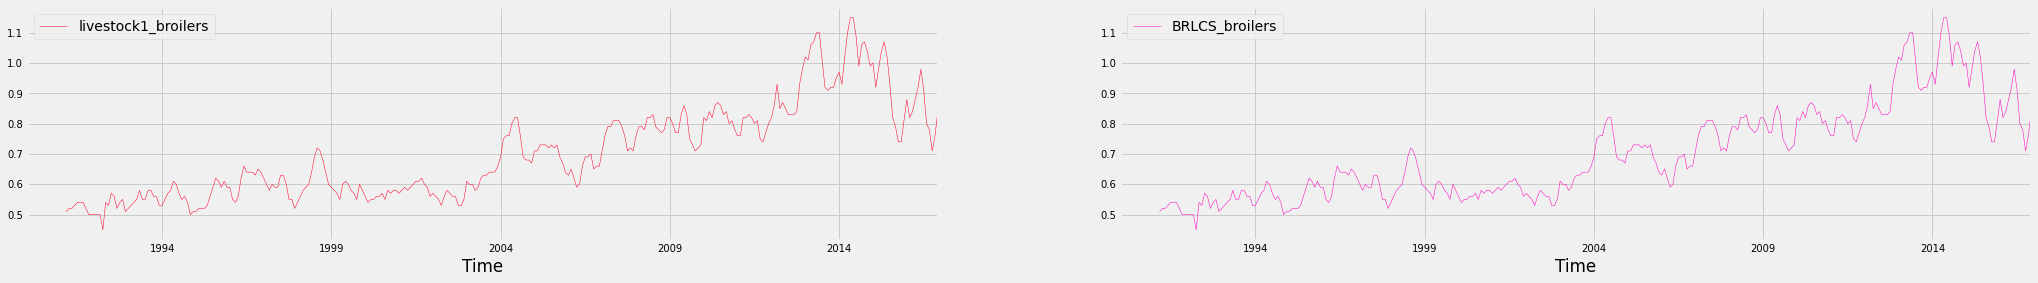

In [ ]:
# Ploting livestock1_broilers and BRLCS_broilers
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock1_broilers","BRLCS_broilers"]].plot(subplots=True,linewidth=0.5,layout =(1,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(32,4),fontsize=10)
plt.show()

In [ ]:
# Observation: livestock1_broilers and BRLCS_broilers are duplicates, therefore one of these variables can be dropped. We will remove livestock1_broilers 
# Creating a list for dropping Columns
drop_col=[]

# Adding livestock1_broilers to drop columns list
drop_col.append("livestock1_broilers")

In [ ]:
# Number of Missing Values
clean_combined_sales_ind[["BRLCS_broilers"]].isnull().sum()

BRLCS_broilers    14
dtype: int64

In [ ]:
# Creating a dictionary for storing methods for treating Missing Values
miss_val_treat = {}

## Missing Values treatment : Since no seasonality, therefore adding linear interpolation & backward fillin method for BRLCS_broiler
miss_val_treat["BRLCS_broilers"]=["Interpolation","Linear","backward"]

correlation between ivestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer:


,livestock2_beef_steers,STRTXOK_beef_steers,livestock3_steers,livestock4_steers
livestock2_beef_steers,1.000000,1.000000,0.988554,0.948098
STRTXOK_beef_steers,1.000000,1.000000,0.988554,0.948098
livestock3_steers,0.988554,0.988554,1.000000,0.957116
livestock4_steers,0.948098,0.948098,0.957116,1.000000


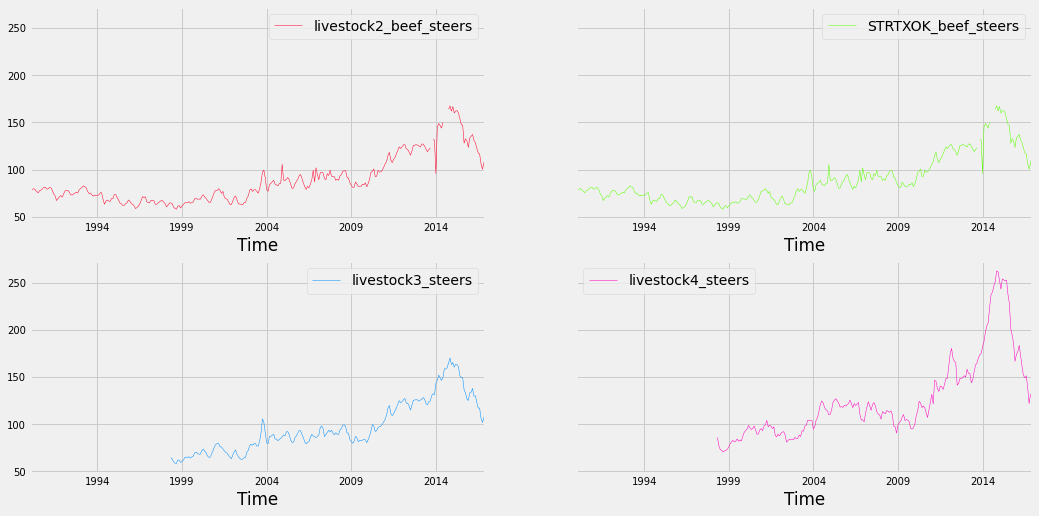

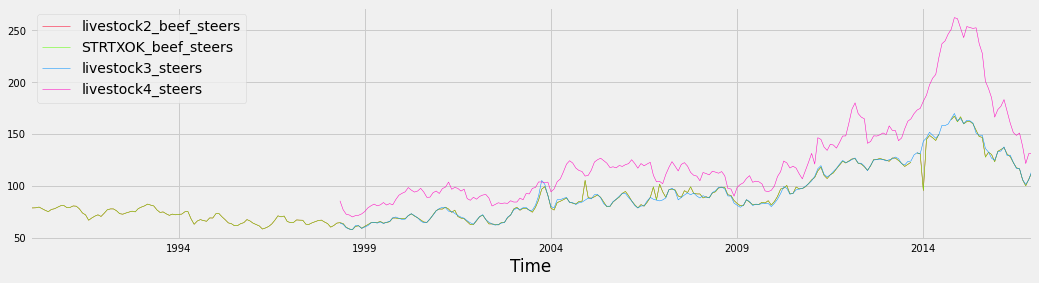

In [ ]:
# Correlation between livestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer 
print ("correlation between ivestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer:" )
display(clean_combined_sales_ind[["livestock2_beef_steers","STRTXOK_beef_steers","livestock3_steers","livestock4_steers"]].corr())
print("\n")

# Ploting livestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer in seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock2_beef_steers","STRTXOK_beef_steers","livestock3_steers","livestock4_steers"]].plot(subplots= True,linewidth=0.5,layout =(2,2),sharex=False,sharey=True,colormap = "gist_rainbow", figsize=(16,8),fontsize=10)
plt.show()
print("\n")

# Ploting livestock2_beef_steers, STRTXOK_beef_steers,livestock3_steer,livestock4_steer in single plot
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock2_beef_steers","STRTXOK_beef_steers","livestock3_steers","livestock4_steers"]].plot(subplots= False,linewidth=0.5,sharex=False,sharey=True,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)
plt.show()

In [ ]:
# Adding "livestock2_beef_steers","livestock3_steers" to drop columns list, since livestock2_beef_steers & STRTXOK_beef_steers are duplicates 
#and livestock3_steers is highly correlated to STRTXOK_beef_steers
drop_col.append("livestock2_beef_steers")
drop_col.append("livestock3_steers")
drop_col

['livestock1_broilers', 'livestock2_beef_steers', 'livestock3_steers']

In [ ]:
# Number of Missing Values
clean_combined_sales_ind[["STRTXOK_beef_steers","livestock4_steers"]].isnull().sum()

STRTXOK_beef_steers      3
livestock4_steers      100
dtype: int64

In [ ]:
# Missing Values treatment : Since no seasonality, therefore adding linear interpolation & backward fillin method 
#for imputation in STRTXOK_beef_steers
miss_val_treat["STRTXOK_beef_steers"]=["Interpolation","Linear","backward"]

# Drop section of time series of livestock4_steer as high number of points are missing
miss_val_treat["livestock4_steers"]=["drop first 100 points"]

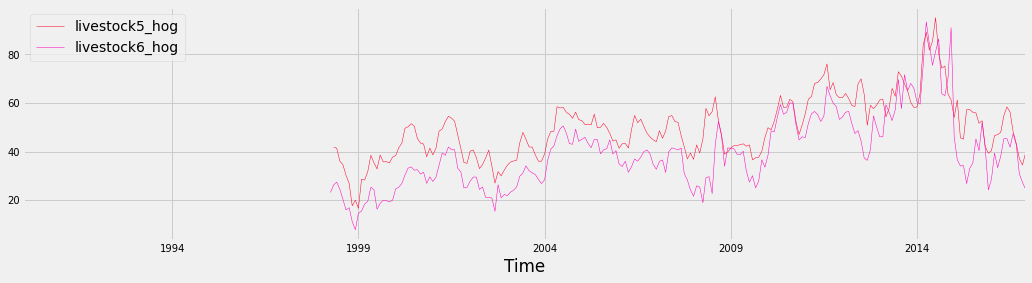

In [ ]:
# Ploting livestock5_hog & livestock6_hog indices on same plot
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock5_hog","livestock6_hog"]].plot(subplots= False,linewidth=0.5,layout =(2,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)

In [ ]:
# Number of Missing Values
clean_combined_sales_ind[["livestock5_hog","livestock6_hog"]].isnull().sum()

livestock5_hog    100
livestock6_hog     99
dtype: int64

In [ ]:
# Drop section of time series of livestock5_hog & livestock6_hog as high number of points are missing
miss_val_treat["livestock5_hog"]=["drop first 100 points"]
miss_val_treat["livestock6_hog"]=["drop first 99 points"]

correlation between all four corn indices:


,corn1,corn2,corn3,corn4
corn1,1.000000,0.995327,0.979124,0.995047
corn2,0.995327,1.000000,0.985676,0.993610
corn3,0.979124,0.985676,1.000000,0.985322
corn4,0.995047,0.993610,0.985322,1.000000


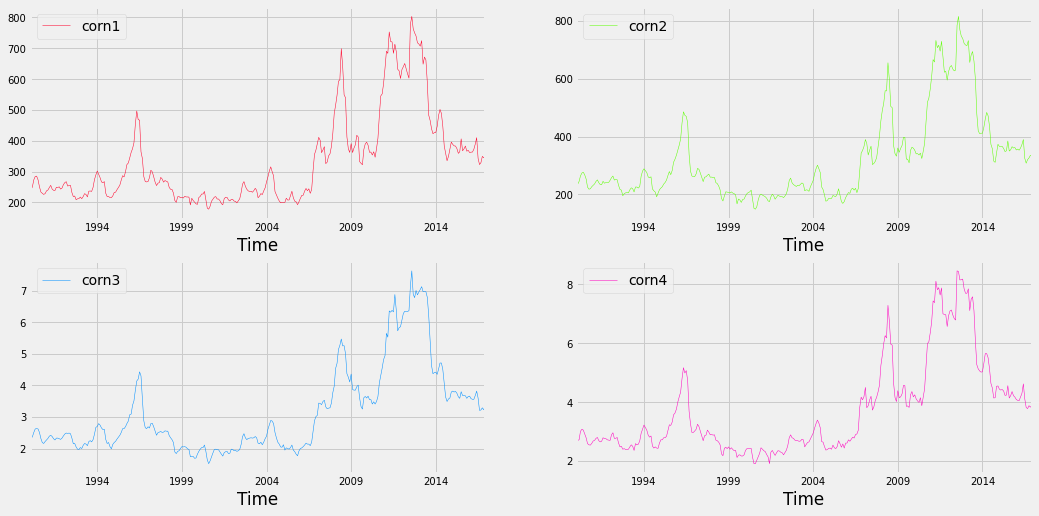

In [ ]:
# correlation between four corn indices
print ("correlation between all four corn indices:" )
display(clean_combined_sales_ind[["corn1","corn2","corn3","corn4"]].corr())
print("\n")

# Ploting all 4 corn indices in seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["corn1","corn2","corn3","corn4"]].plot(subplots= True,linewidth=0.5,layout =(2,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,8),fontsize=10)


In [ ]:
#Adding Corn2 & Corn4 to drop columns list as Corn1, Corn2 and Corn4 seems to be almost perfectly correlated
drop_col.append("corn2")
drop_col.append("corn4")

correlation between all five wheat indices:


,wheat1,wheat2,wheat3,wheat4,wheat5
wheat1,1.000000,0.983777,0.966567,0.955607,0.966186
wheat2,0.983777,1.000000,0.973827,0.968316,0.975263
wheat3,0.966567,0.973827,1.000000,0.985507,0.994178
wheat4,0.955607,0.968316,0.985507,1.000000,0.980796
wheat5,0.966186,0.975263,0.994178,0.980796,1.000000


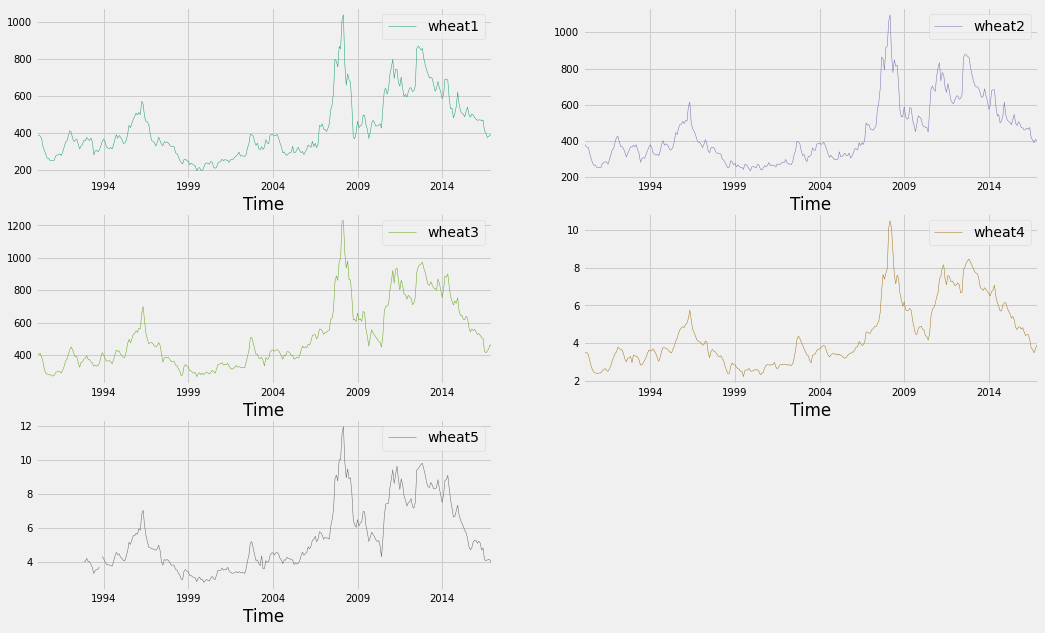

In [ ]:
# correlation between all five wheat indices
print ("correlation between all five wheat indices:" )
display(clean_combined_sales_ind[["wheat1","wheat2","wheat3","wheat4","wheat5"]].corr())
print("\n")

# Ploting all five wheat indices on seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["wheat1","wheat2","wheat3","wheat4","wheat5"]].plot(subplots= True,linewidth=0.5,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)
plt.show()

In [ ]:
# Adding wheat5 to the drop columns list as wheat3 and wheat5 are almost perfectly correlated and wheat5 which have missing values.
drop_col.append("wheat5")
drop_col

['livestock1_broilers',
 'livestock2_beef_steers',
 'livestock3_steers',
 'corn2',
 'corn4',
 'wheat5']

Correlation between hay1 & hay2: 0.9969536593968987




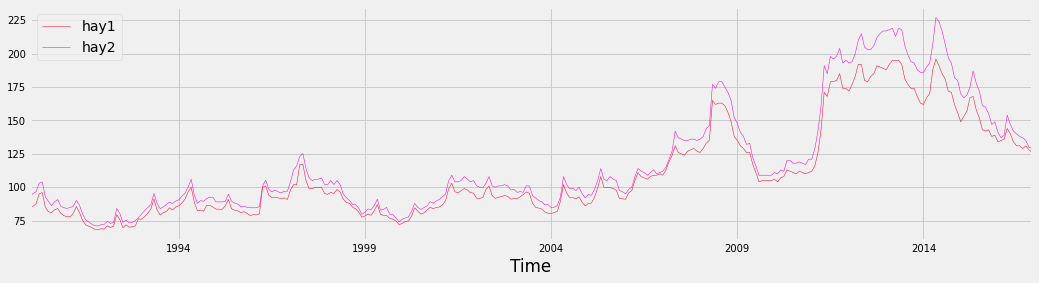

In [ ]:
# correlation between hay1 & hay2
print("Correlation between hay1 & hay2:",clean_combined_sales_ind[["hay1","hay2"]].corr().iloc[0,1])
print("\n")

# Ploting hay1 & hay2 indices on same plot
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["hay1","hay2"]].plot(subplots= False,linewidth=0.5,layout =(2,2),sharex=False,sharey=False,colormap = "gist_rainbow", figsize=(16,4),fontsize=10)

In [ ]:
# Adding hay1 to the drop columns list as hay1 and hay2 are almost perfectly correlated
drop_col.append("hay1")
drop_col

['livestock1_broilers',
 'livestock2_beef_steers',
 'livestock3_steers',
 'corn2',
 'corn4',
 'wheat5',
 'hay1']

Correlation between all six dairy indices:


,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6
dairy1,1.000000,0.790432,0.744431,0.745179,0.776387,0.762165
dairy2,0.790432,1.000000,0.864466,0.740617,0.889111,0.809070
dairy3,0.744431,0.864466,1.000000,0.860978,0.941296,0.945903
dairy4,0.745179,0.740617,0.860978,1.000000,0.871223,0.967362
dairy5,0.776387,0.889111,0.941296,0.871223,1.000000,0.928384
dairy6,0.762165,0.809070,0.945903,0.967362,0.928384,1.000000


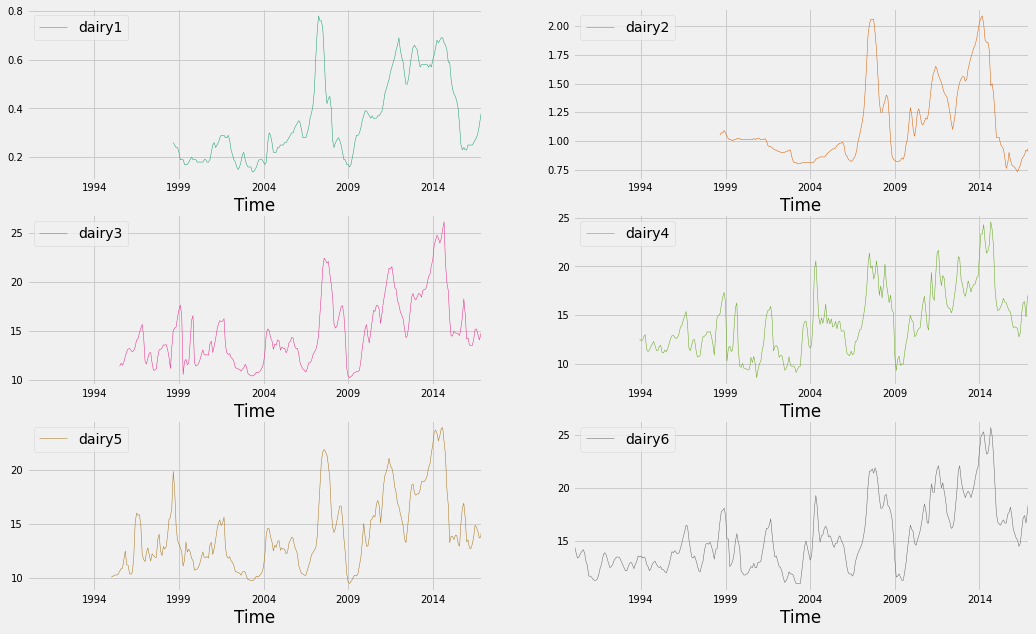

In [ ]:
# correlation between all Six dairy indices
print ("Correlation between all six dairy indices:" )
display(clean_combined_sales_ind[["dairy1","dairy2","dairy3","dairy4","dairy5","dairy6"]].corr())
print("\n")

# Ploting all Six dairy indices on seperate plots
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["dairy1","dairy2","dairy3","dairy4","dairy5","dairy6"]].plot(subplots= True,linewidth=0.5,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2",figsize=(16,10),fontsize=10)


In [ ]:
# Adding dairy4 to the drop columns list as it's highly correlated to dairy6
drop_col.append("dairy4")
drop_col

['livestock1_broilers',
 'livestock2_beef_steers',
 'livestock3_steers',
 'corn2',
 'corn4',
 'wheat5',
 'hay1',
 'dairy4']

In [ ]:
# Number of Missing Values
clean_combined_sales_ind[["dairy1","dairy2","dairy3","dairy5","dairy6"]].isnull().sum()

dairy1    104
dairy2    104
dairy3     66
dairy5     60
dairy6      0
dtype: int64

In [ ]:
#Drop section of time series as high number of points are missing
miss_val_treat["dairy1"]=["drop first 104 points"]
miss_val_treat["dairy2"]=["drop first 104 points"]
miss_val_treat["dairy3"]=["drop first 66 points"]
miss_val_treat["dairy5"]=["drop first 60 points"]

Correlation between GDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest:


,RealGDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest
RealGDP,1.000000,0.981823,-0.907326,0.908044
ConsumerInflt,0.981823,1.000000,-0.936643,0.857514
30YearMtggRate,-0.907326,-0.936643,1.000000,-0.675783
Non-ResidentialInvest,0.908044,0.857514,-0.675783,1.000000


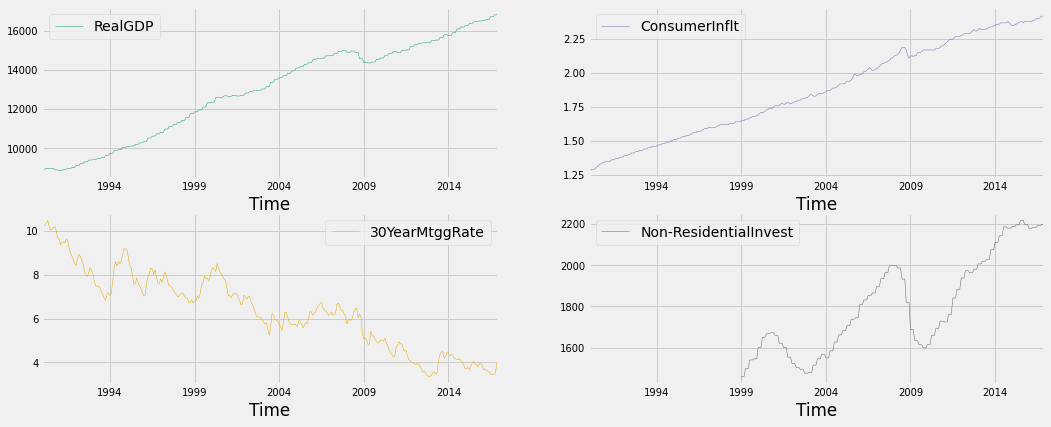

In [ ]:
# correlation between GDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest
print ("Correlation between GDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest:" )
display(clean_combined_sales_ind[["RealGDP","ConsumerInflt","30YearMtggRate","Non-ResidentialInvest"]].corr())
print("\n")

# Ploting GDP,ConsumerInflt,30YearMtggRate,Non-ResidentialInvest
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["RealGDP","ConsumerInflt","30YearMtggRate","Non-ResidentialInvest"]].plot(subplots= True,linewidth=0.5,layout =(3,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(16,10),fontsize=10)
plt.show()

#Observation1 : We can see that GDP and Consumer Inflation are highly positively correlated
#Observation2 : We can see that GDP and 30yearMortgage rate  are highly negatively correlated correlated
#Observation3 : There are missing values in Non-ResidentialInvest index and it's positively correlated to RealGDP

In [ ]:
# Number of Missing Values
clean_combined_sales_ind[["Non-ResidentialInvest"]].isnull().sum()

Non-ResidentialInvest    108
dtype: int64

In [ ]:
#Drop section of time series as high number of points are missing
miss_val_treat["Non-ResidentialInvest"]=["drop first 108 points"]

In [ ]:
# Looking at Missing Values treatment methods for all the variables
miss_val_treat

# Observation : If we remove first 108 data points(9years) and impute few missing values BRLCS_broilers & STRTXOK_beef_steers, We will have good data to work without generating bias in our prediction power of model

{'BRLCS_broilers': ['Interpolation', 'Linear', 'backward'],
 'Non-ResidentialInvest': ['drop first 108 points'],
 'STRTXOK_beef_steers': ['Interpolation', 'Linear', 'backward'],
 'dairy1': ['drop first 104 points'],
 'dairy2': ['drop first 104 points'],
 'dairy3': ['drop first 66 points'],
 'dairy5': ['drop first 60 points'],
 'livestock4_steers': ['drop first 100 points'],
 'livestock5_hog': ['drop first 100 points'],
 'livestock6_hog': ['drop first 99 points']}

In [ ]:
# Looking at variables which needs to be removed
drop_col

['livestock1_broilers',
 'livestock2_beef_steers',
 'livestock3_steers',
 'corn2',
 'corn4',
 'wheat5',
 'hay1',
 'dairy4']

**Strategy for dealing with Missing Values:**



*  Step I : Impute values where imputation is considerable method(as decided in 
missing values exploration). 

*   Step II : Two Options:
1.   Option 1: Consider data after 1999 since imputation is not considerable method for some variables (data file : data_from_1999)
2.   Option 2: Consider complete time series data after removing variables where impuatation is not a considerable method(data file : data_without_missvalcol)










In [ ]:
# Imputing Missing values wherever applicable- BRLCS_broilers &  STRTXOK_beef_steers
clean_combined_sales_ind[["BRLCS_broilers"]] = clean_combined_sales_ind[["BRLCS_broilers"]].interpolate(method='linear', limit_direction="backward")
clean_combined_sales_ind[["STRTXOK_beef_steers"]] = clean_combined_sales_ind[["STRTXOK_beef_steers"]].interpolate(method='linear', limit_direction="backward")

In [ ]:
# Droping the columns which are duplicates or very highly correlated
data_drop_duplicates = clean_combined_sales_ind.drop(columns =drop_col, axis=1)

In [ ]:
# Saving the sales & indices combined file without complete imputation on required Variables
data_without_impute = data_drop_duplicates
data_without_impute.to_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_without_impute.csv")

In [ ]:
# Saving data after 1999 so that analysis can be done with variables which has missing values before 1999
data_from_1999 =data_drop_duplicates["19990131":"20161231"]
data_from_1999.to_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_from_1999.csv")

In [ ]:
# Saving data after dropping complete variables where missing value treatment was to drop certain portion of data
data_without_missvalcol = data_drop_duplicates.drop(columns =['livestock4_steers',
                                    'livestock5_hog',
                                    'livestock6_hog',
                                    'dairy1',
                                    'dairy2',
                                    'dairy3',
                                    'dairy5',
                                    'Non-ResidentialInvest'], axis=1)
data_without_missvalcol.to_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/data_without_missvalcol.csv")